In [1]:
import DataPrepTulips3D as DP
import matplotlib.pyplot as plt
import numpy as np

## Load in MESA data

In [2]:
d = DP.loadMesaData(mesa_LOGS_directory = "../../../example_MESA_data/binary/Profiles/LOGS1", \
                    filename_history = "history1.data",\
                   profiles=['mass', 'logT', 'logRho', 'he4'])

## Lets see what we got:

In [3]:
d.print_summary()

--
** Content of Data1D object **
 * id = ../../../example_MESA_data/binary/Profiles/LOGS1/history1.data
 * Time grid length: 6447

Properties of the total object: 
 - stellar_mass (Tot): len=6447
 - stellar_radius (Tot): len=6447
 - logTeff (Tot): len=6447
Properties as a function of radius: 
 - energy (Grid): len=6447
 - logR (Grid): len=6447
 - mass (Grid): len=6447
 - logT (Grid): len=6447
 - logRho (Grid): len=6447
 - he4 (Grid): len=6447
--


## Lets plot the temperature a.f.o. radius at time index 0

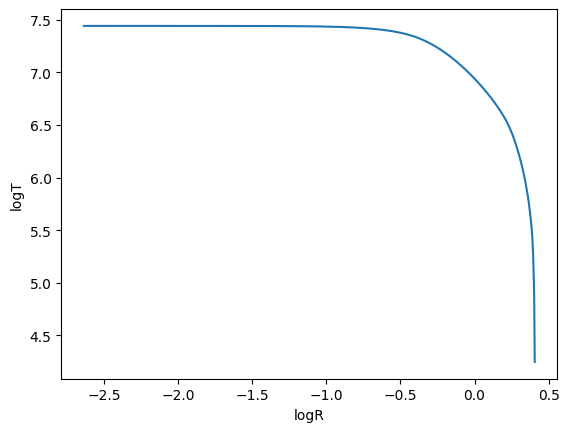

In [4]:
plt.plot(d.get_grid_property("logT").getGrid()[0], d.get_grid_property("logT").getValue()[0])
plt.xlabel("logR")
plt.ylabel("logT")
plt.show()

## We can interpolate values, for example the generated energy

In [5]:
en_interp = d.get_radial_interpolated_property('logT')

In [6]:
f"Interpolated value: {en_interp[0](d.get_grid_property('logT').getGrid()[0][1])}, "+\
f"Real value: {d.get_grid_property('logT').getValue()[0][1]}"

'Interpolated value: 4.247558205643532, Real value: 4.247558205643533'